In [1]:
#Market Basket Analysis

In [ ]:
#Market Basket Analysis is the process of discovering frequent item sets in large transactional database is called market basket analysis.

In [ ]:
#Example:

#Market basket analysis might tell a retailer that customers often purchase colgate toothpaste and brush together, 
#so putting both items on promotion at the same time would not create a significant increase in revenue, while a promotion involving just one of the items would likely drive sales of the other.

In [2]:
#Assosciation rules are produced using algorithms like :

#1. Apriori Algorithm

#2. Eclat Algorithm

#3. FP-growth Algorithm

In [5]:
#Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
#rest of the libraries will be imported were ever necessary
import warnings
warnings.filterwarnings('ignore')

In [7]:
#1. Apriori Algorithm

In [8]:
df1=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Machine Learning 3\\Sem_Preparation\\Market.csv')
df1.head()

,"MILK,BREAD,BISCUIT"
0,"BREAD,MILK,BISCUIT,CORNFLAKES"
1,"BREAD,TEA,BOURNVITA"
2,"JAM,MAGGI,BREAD,MILK"
3,"MAGGI,TEA,BISCUIT"
4,"BREAD,TEA,BOURNVITA"


In [10]:
df1.info()#summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   MILK,BREAD,BISCUIT  19 non-null     object
dtypes: object(1)
memory usage: 280.0+ bytes


In [12]:
df1.shape#19 records and 1 column

(19, 1)

In [14]:
len(df1.columns)#len of columns

1

In [15]:
#Columns Extraction

In [29]:
unique_row_items = []#empty list for the column names
for index, row in df1.iterrows():#is used to iterate over a pandas Data frame rows in the form of (index, series) pair. This function iterates over the data frame column, it will return a tuple with the column name and content in form of series.   
    items_series = list(row.str.split(','))#create a list in a list
    for item_serie in items_series:#looping in the first list
        for item in item_serie:#looping in the first list
            if item not in unique_row_items:#if the item is not there in the list
                unique_row_items.append(item)#append the item

In [30]:
unique_row_items#we will get unique items

['BREAD',
 'MILK',
 'BISCUIT',
 'CORNFLAKES',
 'TEA',
 'BOURNVITA',
 'JAM',
 'MAGGI',
 'COFFEE',
 'COCK',
 'SUGER']

In [ ]:
#Building Apriori Algorithm

In [32]:
df1_apriori=pd.DataFrame(columns=unique_row_items)
df1_apriori

,BREAD,MILK,BISCUIT,CORNFLAKES,TEA,BOURNVITA,JAM,MAGGI,COFFEE,COCK,SUGER


In [ ]:
#Making the use of the data and perform one hot encoding 

In [47]:
for index, row in df1.iterrows():#is used to iterate over a pandas Data frame rows in the form of (index, series) pair. This function iterates over the data frame column, it will return a tuple with the column name and content in form of series.   
    items = str(row[0]).split(',')#accessing the item
    #print(items)
    one_hot_encoding = np.zeros(len(unique_row_items),dtype=int)#len of the columns
    for it in items:
        for i,column in enumerate(df1_apriori.columns):#The enumerate object yields pairs containing a count (from start, whichdefaults to zero) and a value yielded by the iterable argument.
            #print(i,column,it)
            if it == column:#if the item is the column name
                one_hot_encoding[i] = 1 #replace 0 to 1
    df1_apriori.at[index] = one_hot_encoding
    #print(one_hot_encoding)

In [49]:
df1_apriori

,BREAD,MILK,BISCUIT,CORNFLAKES,TEA,BOURNVITA,JAM,MAGGI,COFFEE,COCK,SUGER
0,1,1,1,1,0,0,0,0,0,0,0
1,1,0,0,0,1,1,0,0,0,0,0
2,1,1,0,0,0,0,1,1,0,0,0
3,0,0,1,0,1,0,0,1,0,0,0
4,1,0,0,0,1,1,0,0,0,0,0
5,0,0,0,1,1,0,0,1,0,0,0
6,1,0,1,0,1,0,0,1,0,0,0
7,1,0,0,0,1,0,1,1,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0
9,0,0,1,1,0,0,0,0,1,1,0


In [51]:
df1_apriori.info()#checking the datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   BREAD       19 non-null     object
 1   MILK        19 non-null     object
 2   BISCUIT     19 non-null     object
 3   CORNFLAKES  19 non-null     object
 4   TEA         19 non-null     object
 5   BOURNVITA   19 non-null     object
 6   JAM         19 non-null     object
 7   MAGGI       19 non-null     object
 8   COFFEE      19 non-null     object
 9   COCK        19 non-null     object
 10  SUGER       19 non-null     object
dtypes: object(11)
memory usage: 2.3+ KB


In [53]:
df1_apriori=df1_apriori.astype('int')#changing the datatype

In [54]:
from mlxtend.frequent_patterns import apriori

In [55]:
frequent_items=apriori(df1_apriori,min_support=0.2,use_colnames=True,verbose=1)
frequent_items

Processing 18 combinations | Sampling itemset size 3


,support,itemsets
0,0.631579,(BREAD)
1,0.210526,(MILK)
2,0.315789,(BISCUIT)
3,0.315789,(CORNFLAKES)
4,0.368421,(TEA)
5,0.210526,(BOURNVITA)
6,0.263158,(MAGGI)
7,0.421053,(COFFEE)
8,0.315789,(SUGER)
9,0.210526,"(BREAD, TEA)"


In [57]:
frequent_items.head()

,support,itemsets
0,0.631579,(BREAD)
1,0.210526,(MILK)
2,0.315789,(BISCUIT)
3,0.315789,(CORNFLAKES)
4,0.368421,(TEA)


In [63]:
#Building Assosciation Rules

In [64]:
from mlxtend.frequent_patterns import association_rules

In [65]:
df_association_rules = association_rules(frequent_items, metric = "confidence", min_threshold = 0.2)
df_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BREAD),(TEA),0.631579,0.368421,0.210526,0.333333,0.904762,-0.022161,0.947368
1,(TEA),(BREAD),0.368421,0.631579,0.210526,0.571429,0.904762,-0.022161,0.859649
2,(BREAD),(SUGER),0.631579,0.315789,0.210526,0.333333,1.055556,0.011080,1.026316
3,(SUGER),(BREAD),0.315789,0.631579,0.210526,0.666667,1.055556,0.011080,1.105263
4,(COFFEE),(CORNFLAKES),0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421
5,(CORNFLAKES),(COFFEE),0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842
6,(MAGGI),(TEA),0.263158,0.368421,0.210526,0.800000,2.171429,0.113573,3.157895
7,(TEA),(MAGGI),0.368421,0.263158,0.210526,0.571429,2.171429,0.113573,1.719298
8,(COFFEE),(SUGER),0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421
9,(SUGER),(COFFEE),0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842


In [66]:
df_association_rules.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(MAGGI),(TEA),0.263158,0.368421,0.210526,0.800000,2.171429,0.113573,3.157895
3,(SUGER),(BREAD),0.315789,0.631579,0.210526,0.666667,1.055556,0.011080,1.105263
5,(CORNFLAKES),(COFFEE),0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842
9,(SUGER),(COFFEE),0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842
1,(TEA),(BREAD),0.368421,0.631579,0.210526,0.571429,0.904762,-0.022161,0.859649
7,(TEA),(MAGGI),0.368421,0.263158,0.210526,0.571429,2.171429,0.113573,1.719298
4,(COFFEE),(CORNFLAKES),0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421
8,(COFFEE),(SUGER),0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421
0,(BREAD),(TEA),0.631579,0.368421,0.210526,0.333333,0.904762,-0.022161,0.947368
2,(BREAD),(SUGER),0.631579,0.315789,0.210526,0.333333,1.055556,0.011080,1.026316


In [67]:
df_association_rules['antecedents'].apply(lambda x: str(x))

0         frozenset({'BREAD'})
1           frozenset({'TEA'})
2         frozenset({'BREAD'})
3         frozenset({'SUGER'})
4        frozenset({'COFFEE'})
5    frozenset({'CORNFLAKES'})
6         frozenset({'MAGGI'})
7           frozenset({'TEA'})
8        frozenset({'COFFEE'})
9         frozenset({'SUGER'})
Name: antecedents, dtype: object

In [68]:
cols = ['antecedents','consequents']
df_association_rules[cols] = df_association_rules[cols].applymap(lambda x: tuple(x))
print (df_association_rules)

     antecedents    consequents  antecedent support  consequent support  \
0       (BREAD,)         (TEA,)            0.631579            0.368421   
1         (TEA,)       (BREAD,)            0.368421            0.631579   
2       (BREAD,)       (SUGER,)            0.631579            0.315789   
3       (SUGER,)       (BREAD,)            0.315789            0.631579   
4      (COFFEE,)  (CORNFLAKES,)            0.421053            0.315789   
5  (CORNFLAKES,)      (COFFEE,)            0.315789            0.421053   
6       (MAGGI,)         (TEA,)            0.263158            0.368421   
7         (TEA,)       (MAGGI,)            0.368421            0.263158   
8      (COFFEE,)       (SUGER,)            0.421053            0.315789   
9       (SUGER,)      (COFFEE,)            0.315789            0.421053   

    support  confidence      lift  leverage  conviction  
0  0.210526    0.333333  0.904762 -0.022161    0.947368  
1  0.210526    0.571429  0.904762 -0.022161    0.859649  


In [69]:
df_association_rules = (df_association_rules.explode('antecedents').reset_index(drop=True).explode('consequents').reset_index(drop=True))
df_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,BREAD,TEA,0.631579,0.368421,0.210526,0.333333,0.904762,-0.022161,0.947368
1,TEA,BREAD,0.368421,0.631579,0.210526,0.571429,0.904762,-0.022161,0.859649
2,BREAD,SUGER,0.631579,0.315789,0.210526,0.333333,1.055556,0.011080,1.026316
3,SUGER,BREAD,0.315789,0.631579,0.210526,0.666667,1.055556,0.011080,1.105263
4,COFFEE,CORNFLAKES,0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421
5,CORNFLAKES,COFFEE,0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842
6,MAGGI,TEA,0.263158,0.368421,0.210526,0.800000,2.171429,0.113573,3.157895
7,TEA,MAGGI,0.368421,0.263158,0.210526,0.571429,2.171429,0.113573,1.719298
8,COFFEE,SUGER,0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421
9,SUGER,COFFEE,0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842


In [70]:
df_association_rules["product_group"] = df_association_rules["antecedents"].apply(lambda x: str(x)) + "," + df_association_rules["consequents"].apply(lambda x: str(x))
df_association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,product_group
0,BREAD,TEA,0.631579,0.368421,0.210526,0.333333,0.904762,-0.022161,0.947368,"BREAD,TEA"
1,TEA,BREAD,0.368421,0.631579,0.210526,0.571429,0.904762,-0.022161,0.859649,"TEA,BREAD"
2,BREAD,SUGER,0.631579,0.315789,0.210526,0.333333,1.055556,0.011080,1.026316,"BREAD,SUGER"
3,SUGER,BREAD,0.315789,0.631579,0.210526,0.666667,1.055556,0.011080,1.105263,"SUGER,BREAD"
4,COFFEE,CORNFLAKES,0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421,"COFFEE,CORNFLAKES"
5,CORNFLAKES,COFFEE,0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842,"CORNFLAKES,COFFEE"
6,MAGGI,TEA,0.263158,0.368421,0.210526,0.800000,2.171429,0.113573,3.157895,"MAGGI,TEA"
7,TEA,MAGGI,0.368421,0.263158,0.210526,0.571429,2.171429,0.113573,1.719298,"TEA,MAGGI"
8,COFFEE,SUGER,0.421053,0.315789,0.210526,0.500000,1.583333,0.077562,1.368421,"COFFEE,SUGER"
9,SUGER,COFFEE,0.315789,0.421053,0.210526,0.666667,1.583333,0.077562,1.736842,"SUGER,COFFEE"


In [71]:
df_new = df_association_rules.loc[:,["product_group","confidence","lift"]].sort_values("confidence",ascending=False)
df_new

,product_group,confidence,lift
6,"MAGGI,TEA",0.800000,2.171429
3,"SUGER,BREAD",0.666667,1.055556
5,"CORNFLAKES,COFFEE",0.666667,1.583333
9,"SUGER,COFFEE",0.666667,1.583333
1,"TEA,BREAD",0.571429,0.904762
7,"TEA,MAGGI",0.571429,2.171429
4,"COFFEE,CORNFLAKES",0.500000,1.583333
8,"COFFEE,SUGER",0.500000,1.583333
0,"BREAD,TEA",0.333333,0.904762
2,"BREAD,SUGER",0.333333,1.055556


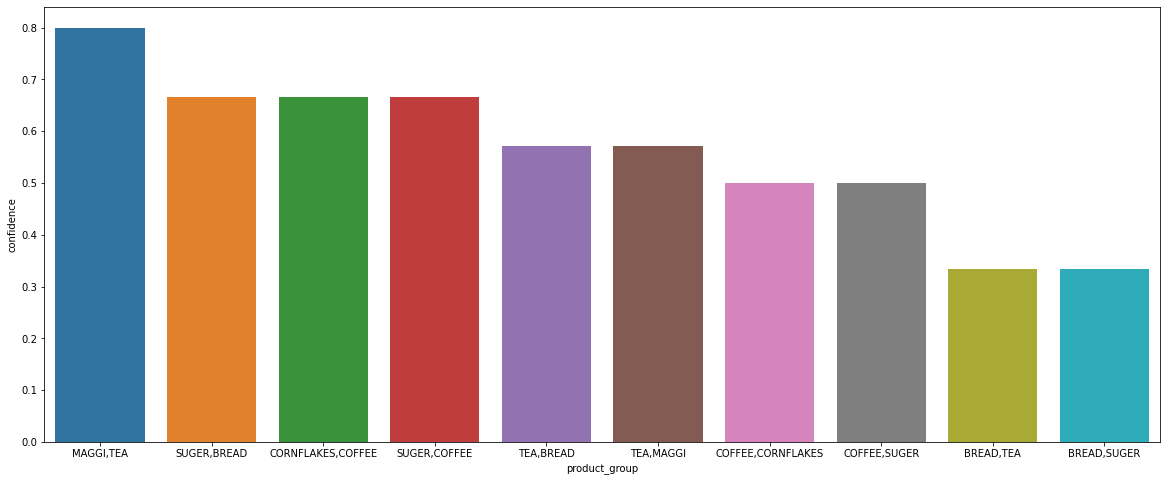

In [74]:
plt.figure(figsize=(20,8))
sns.barplot(x="product_group",y="confidence",data=df_new)
plt.show()

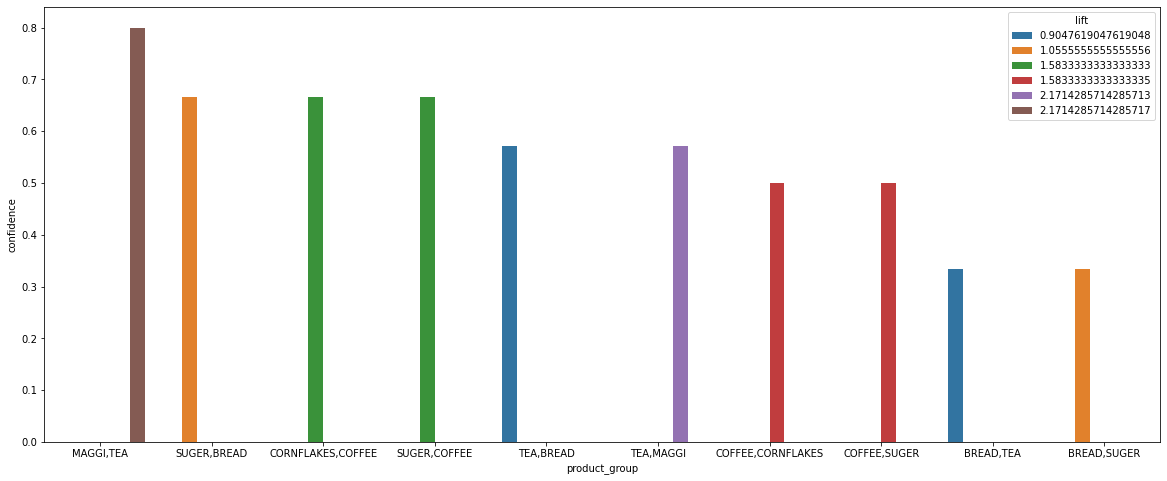

In [76]:
plt.figure(figsize=(20,8))
sns.barplot(x="product_group",y="confidence",hue='lift',data=df_new)
plt.show()

<Figure size 1440x576 with 0 Axes>

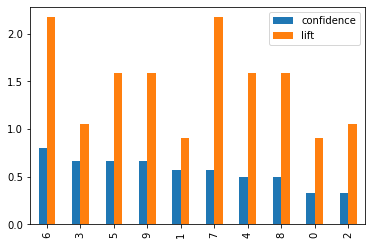

In [83]:
plt.figure(figsize=(20,8))
df_new.plot.bar()
plt.show()

In [ ]:
#conclusion

#80% of customers who buy MAGGI (Instant soup) buy it in tea.

#TEA and MAGGI products increase their sales by 2.17 times mutually.

#66% of customers who buy SUGAR buy it in bread.

#42% of customers who buy COFFEE buy sugar and CORNFLAKES. At the same time, 33% of these sales are in bread.